<a href="https://colab.research.google.com/github/Rbca0/Data-Science/blob/main/unitthree/RebevanBU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
##gemeni helped

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 3.4 MB/s eta 0:00:00


Merriam-Webster defines Detroit as "a river 31 miles (50 kilometers) long in Ontario and southeastern Michigan connecting Lake Erie and Lake Saint Clair," and "a city in southeastern Michigan on the Detroit River, the most populous city in the state population 713,777" (Merriam -Webster). Merriam Webster defines grocery store as "a store that sells food and household supplies:supermarket" (Merriam-Webster). I don't know anything about grocery stores in Detroit except they most likely exist, so I am inticed to find the true square footage of grocery stores there.


In [3]:
sqft=pd.read_csv('https://raw.githubusercontent.com/Rbca0/Data-Science/refs/heads/main/Grocery_Stores%20-%20Grocery_Stores.csv.csv')
##gemeni helped me put quotes

In [4]:
sqft

,OBJECTID,Company,Address,City,State,ZipCode,Better_Lat,Better_Long,SquareFeet,Common_Name,Notes,PHONE,FAX,EMAIL,WEBSITE,DIG_MEMBER,Data_Source,Centroid_X,Centroid_Y,ORIG_FID
0,1,NAFSU ENTERPRISES INC,10320 PLYMOUTH RD,DETROIT,MI,48204,42.373652,-83.162775,15879.452100,Shop A Lot Food Center,NaN,NaN,NaN,NaN,NaN,NaN,NETS/Devries,-83.162894,42.373634,1.0
1,2,RED FOX FOODLAND,10333 FENKELL ST,DETROIT,MI,48238,42.402180,-83.163377,16130.740860,Red Fox Foodland,NaN,NaN,NaN,NaN,NaN,NaN,NETS/Devries,-83.163460,42.402178,2.0
2,3,X Z INC,11100 MACK AVE,DETROIT,MI,48214,42.377829,-82.980885,14160.290540,NaN,Closed. Building for sale and phone off. - RL,NaN,NaN,NaN,NaN,NaN,NETS/Devries,-82.980411,42.378031,3.0
3,4,UNIVERSITY FOOD CENTER INC,1131 W WARREN AVE,DETROIT,MI,48201,42.353200,-83.074400,22100.821550,University Foods,NaN,(313) 833-0815,(313) 833-5648,nyaldoo@spartanstores.com,http://universityfoodsmidtown.com/,Yes,NETS/Devries,-83.074478,42.352644,4.0
4,5,SAVE A LOT,11825 WOODWARD AVE,DETROIT,MI,48203,42.393700,-83.089300,16124.320670,Save A Lot,Not in Detroit? Seems to be in Highland Park RL,NaN,NaN,NaN,NaN,NaN,NETS/Devries,-83.089592,42.393828,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,119,Tom Boy Supermarket,4120 Second St,Detroit,MI,48201,NaN,NaN,7765.677603,Tom Boy Supermarket,Data Verified by PH - 5/25/2012,(313) 831-7071,NaN,NaN,NaN,NaN,NETS/Devries,-83.065047,42.349237,119.0
114,120,Eve's Downtown Gourmet,1411 Washington Blvd,Detroit,MI,48226,NaN,NaN,3070.290504,Eve's Downtown Gourmet,Area approximated. Frontage exact. Depth rough.,(313) 964-4100,NaN,NaN,NaN,NaN,Rob Linn,-83.051437,42.333930,120.0
115,122,Whole Foods Market,115 Mack Ave,Detroit,MI,48201,NaN,NaN,NaN,Whole Foods Market,NaN,(313) 576-5300,NaN,NaN,Wholefoodsmarket.com,NaN,Josh,NaN,NaN,NaN
116,123,Meijer,1301 W. 8 Mile Rd,Detroit,MI,48203,NaN,NaN,NaN,Meijer,NaN,NaN,NaN,NaN,NaN,NaN,Josh,NaN,NaN,NaN


Assumptions: Probably, the grocery stores in Detroit, Michigan are similar to the average grocery store in Austin, Texas.

(array([4., 5., 4., 5., 1., 5., 9., 3., 5., 6., 7., 8., 8., 5., 2., 4., 2.,
        6., 2., 2., 2., 0., 2., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1.]),
 array([  874.1672115 ,  2071.97147535,  3269.77573919,  4467.58000304,
         5665.38426689,  6863.18853073,  8060.99279458,  9258.79705843,
        10456.60132227, 11654.40558612, 12852.20984997, 14050.01411381,
        15247.81837766, 16445.62264151, 17643.42690535, 18841.2311692 ,
        20039.03543305, 21236.83969689, 22434.64396074, 23632.44822459,
        24830.25248843, 26028.05675228, 27225.86101613, 28423.66527997,
        29621.46954382, 30819.27380767, 32017.07807151, 33214.88233536,
        34412.68659921, 35610.49086305, 36808.2951269 , 38006.09939075,
        39203.90365459, 40401.70791844, 41599.51218229, 42797.31644613,
        43

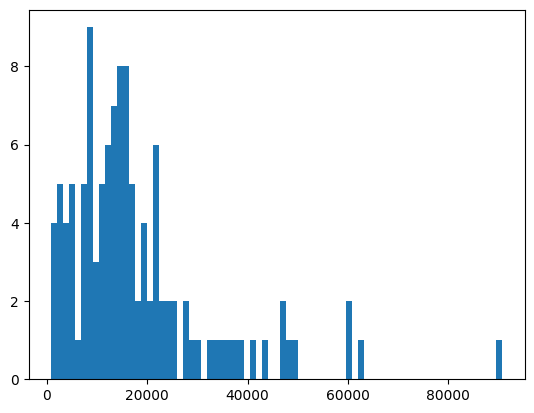

In [5]:
plt.hist(sqft.SquareFeet, bins=75)

The histogram shows the data as right skewed with a maximum of arounf 9000ft^2. The mean is around 2500ft^2 and the median is slightly lower than that. There is one possible outlier in the positive x direction.

I think a reasonable distribution to start with is the gamma. It looks fairly similar to the histogram and Mr. Arredondo told me it was a good place to start. It also supports all positive numbers, which make sense given I'm trying to analyze square footage, which can only be positive.

<Axes: >

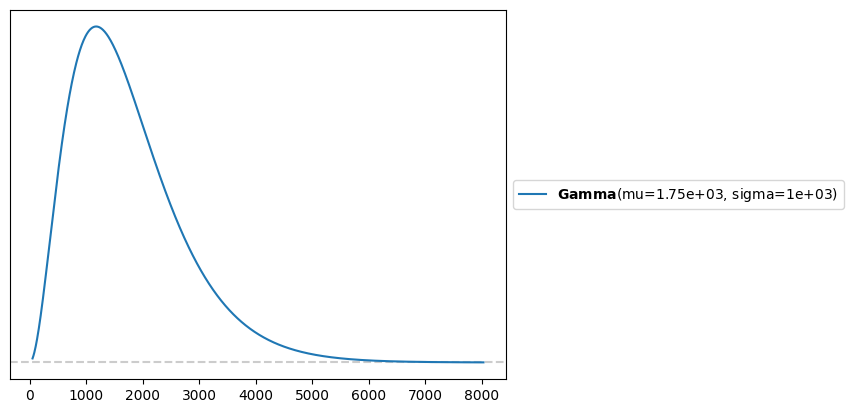

In [11]:
pz.Gamma(mu=1750, sigma=1000).plot_pdf()
##gemeni hleped me spell

In [12]:
#
with pm.Model() as sqft_model:
    # the mean seems to be about 1750
    μ = pm.Gamma('μ', mu=30000, sigma=3000)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.Gamma('σ', mu=5000, sigma=3000)

    #our fancy new likelihood, with two priors
    Y = pm.Gamma('Y', mu = μ, sigma = σ, observed=sqft.SquareFeet)
    idata_sqft = pm.sample()


/usr/local/lib/python3.12/dist-packages/pymc/model/core.py:1300: ImputationWarning: Data in Y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

In [14]:
pm.sample_posterior_predictive(idata_sqft, model=sqft_model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y_observed'>

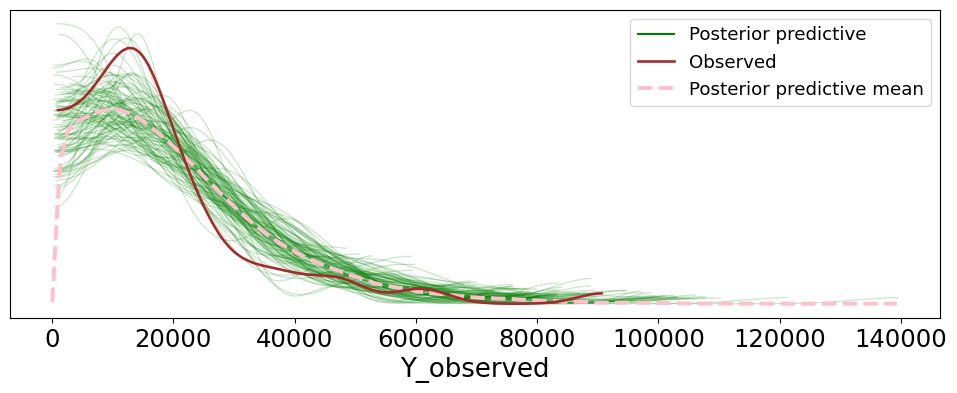

In [36]:
az.plot_ppc(idata_sqft, num_pp_samples=100, figsize=(12, 4), colors=["green", "brown", "pink"])

This is great! While the posterior predicted mean is 0 at 0 which is bad, the model is fairly close to the data line and predicts that there will be a few very large outliers, which is somthing I want my model to have. I want to try the Chi-Squared distribution next to see if that will solve the problem of the model starting at zero.

<Axes: >

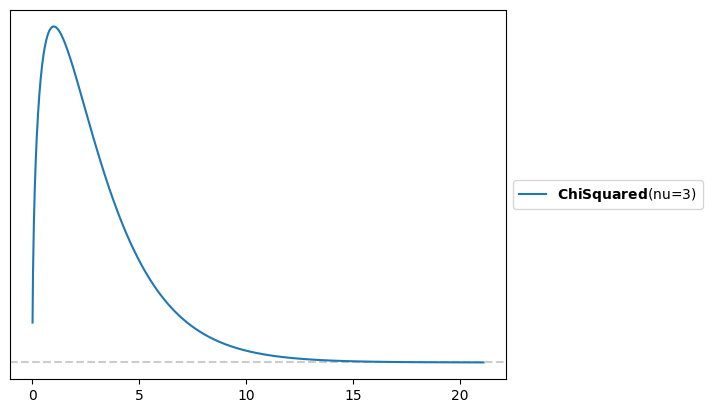

In [16]:
pz.ChiSquared(nu=3).plot_pdf()

wow such distributed

In [17]:
#
with pm.Model() as sqft_model_chi:
    # Prior for the degrees of freedom (nu)
    # Since nu must be positive, we can use a HalfNormal or Gamma prior
    ν = pm.HalfNormal('ν', sigma=300) # Using HalfNormal with a reasonable sigma

    # The Chi-Squared likelihood, parameterized by nu
    Y = pm.ChiSquared('Y', nu=ν, observed=sqft.SquareFeet)
    idata_sqft_chi = pm.sample()
    ##gmemeimi

/usr/local/lib/python3.12/dist-packages/pymc/model/core.py:1300: ImputationWarning: Data in Y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

In [18]:
pm.sample_posterior_predictive(idata_sqft_chi, model=sqft_model_chi, extend_inferencedata=True)
#gemani hepled me spell

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y_observed'>

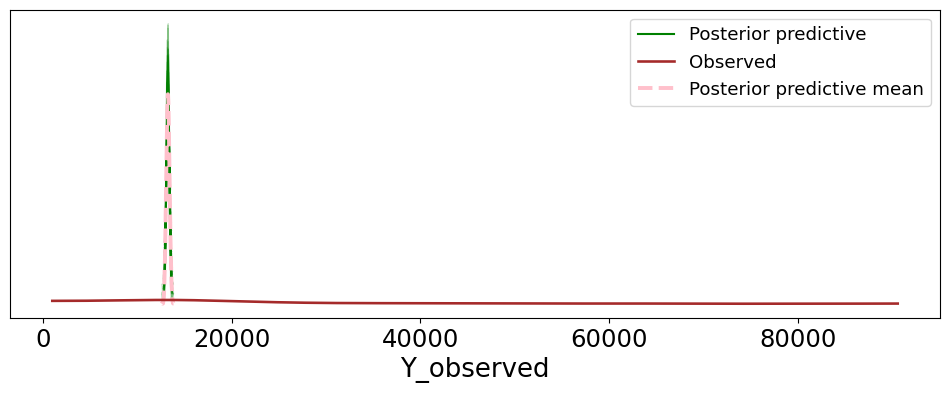

In [37]:
az.plot_ppc(idata_sqft_chi, num_pp_samples=100, figsize=(12, 4), colors=["green", "brown", "pink"])

This model is much, much bad. I don't know why the blue curve is not like the orange curve, but I think the previous one is much closer and will be using that one. I'm going to try again. I think a Log-Normal might be a good distribution to try because Arredondo told me to.

<Axes: >

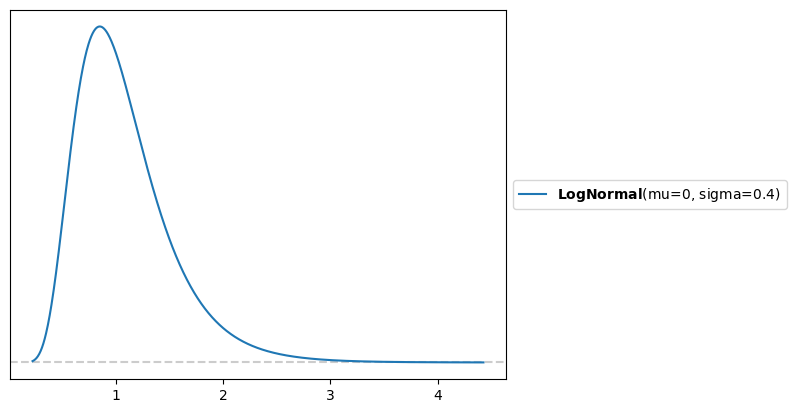

In [23]:
##trylognormal ##gamamani
pz.LogNormal(mu=0, sigma=.4).plot_pdf()

In [30]:
#
with pm.Model() as sqft_model_logn:
    # Prior for the mean and standard deviation of the underlying normal distribution
    μ = pm.Normal('μ', mu=0, sigma=.9)  # Prior for mu
    σ = pm.HalfNormal('σ', sigma=1) # Prior for sigma (must be positive)

    # The lognormal likelihood, parameterized by mu and sigma
    Y = pm.LogNormal('Y', mu=μ, sigma=σ, observed=sqft.SquareFeet)
    idata_sqft_LogNormal = pm.sample()
    ##gmemeini

/usr/local/lib/python3.12/dist-packages/pymc/model/core.py:1300: ImputationWarning: Data in Y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

In [31]:
pm.sample_posterior_predictive(idata_sqft_LogNormal, model=sqft_model_logn, extend_inferencedata=True)
#gemgamenimi hepled me spell

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y_observed'>

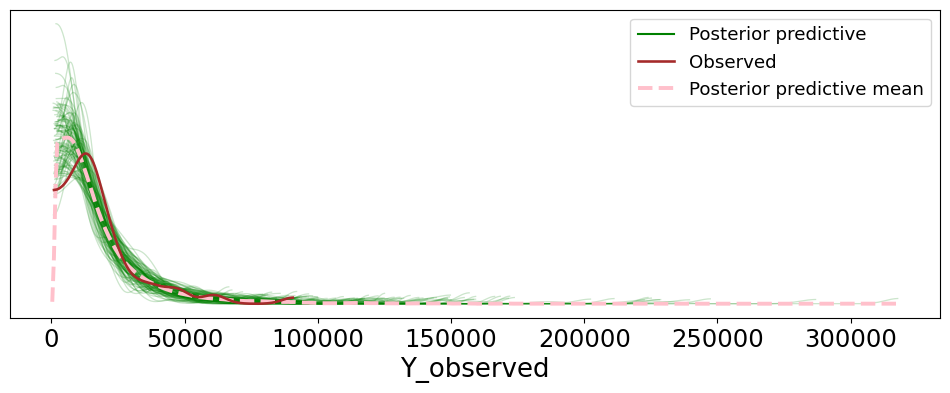

In [38]:
az.plot_ppc(idata_sqft_LogNormal, num_pp_samples=100, figsize=(12, 4), colors=["green", "brown", "pink"])

This posterior predictive check shows a pretty close following of the line for high values of Y, but the mean is much higher for very small values of Y_Observed, which is not ideal. In the Gamma distribution, though, the posterior predctive mean was always undershooting or overshooting the data line to make it a smoother curve.

##Conclusion
Overall, the best model is my final try, LogNormal, for both curve fitting purposes and contexually. The only two distributions really in contention are gamma and lognormal, and the lognormal both fits better and makes more sense contextually. For example, the Gamma distribution is used in science to predict the amount of time before an event happening, like an instance of atomic decay. The LogNormal distribution is used when the logarithm of the variable studied is normal, which means its applications are very wide and anything that results from an accumulation of small factors can be used. The LogNormal distribution is commonly used in biology and engineering, so it follows that my application of grocery store size would follow a LogNormal curve, too.
hooray!